### Hasning med Pythons inbyggda dictionary
https://canvas.kth.se/courses/44835/pages/forelasning-11-hashning-bloomfilter?module_item_id=831863

### Förklaring av Snabb Sökning med Hashning
1. **Hashning ger snabb sökning:** Hashning omvandlar nycklar till index i en hashtabell med hjälp av en hashfunktion. Detta gör det möjligt att komma åt data med konstant tid, `O(1)`, under ideala förhållanden. Det innebär att oberoende av hur stor datamängden är, tar det ungefär lika lång tid att hitta ett element.

### Skiss av Hashtabellen
1. **Hashtabellen:** Tabellen består av en lista med `size` antal slots. Varje slot kan innehålla en länkad lista för att hantera kollisioner.

### Val av Hashfunktion, Krockhantering och Tabellstorlek
1. **Hashfunktion:**
   - Användningen av summan av ASCII-värdena för tecknen i nyckeln och sedan modulära operationen (`% self.size`) säkerställer att hashvärdet hamnar inom hashtabellens storlek. Detta är en enkel och effektiv metod för att generera index men kan leda till kollisioner om nycklarna är liknande.
   - **Vad är ASCII?** ASCII står för American Standard Code for Information Interchange. Det är en teckenkodning som används för att representera text i datorer och andra enheter som använder text. Varje tecken (som bokstäver och siffror) tilldelas ett unikt nummeriskt värde.

2. **Krockhantering:**
   - Jag använder länkade listor för att hantera kollisioner. När två nycklar ger samma index, läggs den nya noden till i slutet av listan på det indexet. Denna metod kallas för 'chaining'.

3. **Tabellstorlek:**
   - Jag valde en storlek på 1000 för hashtabellen, vilket antas vara tillräckligt stort för det aktuella datasetet. Större tabellstorlek minskar risken för kollisioner men använder mer minne.

### Mätning av Kollisioner och Fördelning
1. **Kollisioner:** 
   - För att mäta effektiviteten i krockhanteringen kan vi räkna antalet krockar vid insättning. En hög frekvens av kollisioner kan indikera behovet av en bättre hashfunktion eller en större hashtabell.

2. **Fördelning:**
   - En bra hashfunktion bör distribuera nycklarna jämnt över hashtabellen. En ojämn fördelning leder till långa länkade listor vid vissa index och därmed långsammare söktider.

### Tidskomplexitet för Hashtabeller
1. **Bästa Fall (`O(1)`):** I bästa fall, när det inte finns några kollisioner, är tidskomplexiteten för både insättning och sökning `O(1)`. Detta innebär att operationen utförs i konstant tid oavsett storleken på datamängden.

2. **Värsta Fall (`O(n)`):** I värsta fall, när alla nycklar mappas till samma index och skapar en lång länkad lista, är tidskomplexiteten för insättning och sökning `O(n)`, där `n` är antalet element i hashtabellen. Detta scenario inträffar vid dålig fördelning eller dålig hashfunktion.

### Beskrivning av Krockhantering och Hämtning av Värden
1. **Krockhantering via Länkade Listor:**
   - När en nyckel hashas till ett index där det redan finns en nod, läggs den nya noden till i slutet av den länkade listan på det indexet. Detta gör att alla noder med samma hashvärde kedjas samman.

2. **Hämtning av Värden:**
   - För att hämta ett värde med en given nyckel, beräknas först indexet med hashfunktionen. Därefter går programmet igenom den länkade listan på det indexet tills det hittar en nod med den matchande nyckeln. Detta är en effektiv process om listan är kort, men kan ta längre tid om det finns många kollisioner och därmed en längre lista att söka igenom, dvs `O(n)`

In [137]:
class DictHash:
    def __init__(self):
        self.dict = {}

    def store(self, key, data):
        """ Lagrar data med angiven nyckel. """
        self.dict[key] = data

    def search(self, key):
        """ Söker efter data med angiven nyckel. """
        if key in self.dict:
            return self.dict[key]
        else:
            raise KeyError(f"Key '{key}' not found.")

    def __getitem__(self, key):
        """ Möjliggör syntaxen d[nyckel] för att hämta data. """
        return self.search(key)

    def __contains__(self, key):
        """ Möjliggör syntaxen 'if nyckel in d' för att kontrollera om nyckeln finns. """
        return key in self.dict
        raise KeyError(f"Key '{key}' not found.")

    def __getitem__(self, key):
        """ Möjliggör syntaxen d[nyckel] för att hämta data. """
        return self.search(key)

    def __contains__(self, key):
        """ Möjliggör syntaxen 'if nyckel in d' för att kontrollera om nyckeln finns. """
        return key in self.dict
    
d = DictHash()
d.store("Exempel", "Värde")
print(d.search("Exempel")) 
print(d["Exempel"])        
print("Exempel" in d)   
d = DictHash()
d.store("Exempel", "Värde")
print(d.search("Exempel")) 
print(d["Exempel"])        
print("Exempel" in d)      


Värde
Värde
True
Värde
Värde
True


### Hashclass

#### Collision handelling: Chain / Linked list
#### Advantages:
- Simple to implement. 
- Hash table never fills up, we can always add more elements to the chain. 
- Less sensitive to the hash function or load factors. 
- It is mostly used when it is unknown how many and how frequently keys may be inserted or deleted. 
#### Disadvantages: 
- The cache performance of chaining is not good as keys are stored using a linked list. Open addressing provides better cache performance as everything is stored in the same table. 
- Wastage of Space (Some Parts of the hash table are never used) 
- If the chain becomes long, then search time can become O(n) in the worst case
- Uses extra space for links

#### Performance of Chaining: 
Performance of hashing can be evaluated under the assumption that each key is equally likely to be hashed to any slot of the table (simple uniform hashing).  

$m = \text{Number of slots in hash table}$

$n = \text{Number of keys to be inserted in hash table}$

Load factor α = $\frac{n}{m}$
Expected time to search = $O(1 + α)$
Expected time to delete = $O(1 + α)$

Time to insert = $O(1)$
Time complexity of search insert and delete is $O(1)$ if $α$ is $O(1)$



In [2]:
class HashNode:
    """Noder till klassen Hashtable. Varje nod representerar ett dataelement i hashtabellen."""

    def __init__(self, key, value):
        self.key = key  # Nyckeln för dataelementet
        self.value = value  # Själva datavärdet
        self.next = (
            None  # En pekare till nästa nod i en krocklista (används vid kollisioner)
        )


class Hashtable:
    def __init__(self, size=10):
        self.size = size  # Storleken på hashtabellen, antalet 'slots' i tabellen
        self.table = [None] * size  # Skapar hashtabellen, inledningsvis tomma slots

    def hashfunction(self, key):
        """En enkel hashfunktion som omvandlar en nyckel till ett index i hashtabellen."""
        hash_sum = 0
        for char in str(key):
            hash_sum += ord(
                char
            )  # Omvandlar varje tecken i nyckeln till dess ASCII-värde och summerar
        return (
            hash_sum % self.size
        )  # Använder modulus för att se till att indexet är inom tabellstorleken

    def store(self, key, value):
        """Lagrar ett värde med en specifik nyckel i hashtabellen."""
        index = self.hashfunction(key)  # Beräknar indexet för nyckeln
        node = self.table[index]

        # Om det inte finns något på detta index, lägg till en ny nod här
        if node is None:
            self.table[index] = HashNode(key, value)
            return

        # Om det finns en nod, gå igenom krocklistan för att hitta rätt plats eller uppdatera en befintlig nyckel
        prev = None
        while node is not None:
            if node.key == key:
                node.value = value  # Uppdatera befintlig nyckel
                return
            prev = node
            node = node.next

        # Om nyckeln inte finns, lägg till en ny nod i slutet av krocklistan
        prev.next = HashNode(key, value)

    def search(self, key):
        """Hämtar ett värde baserat på nyckeln. Kastar KeyError om nyckeln inte finns."""
        index = self.hashfunction(key)  # Beräknar indexet för nyckeln
        node = self.table[index]

        # Gå igenom krocklistan på detta index för att hitta noden med rätt nyckel
        while node is not None:
            if node.key == key:
                return node.value
            node = node.next

        # Om nyckeln inte finns, kasta ett KeyError
        raise KeyError(f"Nyclen '{key}' finns inte i hashtabellen.")

    def __str__(self):
        output = []
        for i in range(self.size):
            node = self.table[i]
            while node is not None:
                output.append(f"{node.key}: {node.value}")
                node = node.next
        return "{" + ", ".join(output) + "}"

    def __contains__(self, key):
        try:
            self.search(key)
            return True
        except KeyError:
            return False

    def __len__(self):
        count = 0
        for i in range(self.size):
            node = self.table[i]
            while node is not None:
                count += 1
                node = node.next
        return count


### Testning del 1

In [3]:
import csv

def load_data(filename, hashtable):
    with open(filename, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Hoppa över rubrikraden
        for parts in csv_reader:
            if len(parts) < 10:  # Kontrollera att det finns tillräckligt många delar i raden
                continue
            drama_name = parts[0]
            details = {
                'Rating': parts[1],
                'Actors': parts[2],
                'Viewship Rate': parts[3],
                'Genre': parts[4],
                'Director': parts[5],
                'Writer': parts[6],
                'Year': parts[7],
                'No of Episodes': parts[8],
                'Network': parts[9]
            }
            hashtable.store(drama_name, details)  # Använd put för att lägga till data i hashtabellen

# Huvudprogrammet
hashtable = Hashtable(size=1000)  # Justera storleken baserat på ditt dataset
filename = "kdrama.csv"

load_data(filename, hashtable)

print(len(hashtable))  # Skriv ut antalet element i hashtabellen
# print(hashtable) # Ta bort kommentaren för denna rad för att se hela hashtabellen
shouldBeInHash = "Legend of the Blue Sea"
shouldntBeInHash = "My love from the star AND A BIG FAT YELLOW CAR"
if shouldBeInHash in hashtable: 
    print(hashtable.search(shouldBeInHash))  
try:
    print(hashtable.search(shouldntBeInHash))
except KeyError:
    print(f"{shouldntBeInHash} finns inte i hashtabellen.")

241
{'Rating': '8.1', 'Actors': 'Jun Ji-hyun, Lee Min-ho', 'Viewship Rate': '17.6', 'Genre': 'Fantasy,Romance,Comedy', 'Director': 'Jin Hyuk, Park Seon-Ho', 'Writer': 'Park Ji-eun', 'Year': '2016', 'No of Episodes': '21', 'Network': 'SBS'}
My love from the star AND A BIG FAT YELLOW CAR finns inte i hashtabellen.


In [6]:
details = {
    "Namn": "Kalle",
    "Ålder": 25,
}
hashtable = Hashtable(size=10)
hashtable.store("Kalle", details)

if "Kalle" in hashtable:
    print(hashtable.search("Kalle"))
    

{'Namn': 'Kalle', 'Ålder': 25}


KeyError: "Nyclen 'Intekalle' finns inte i hashtabellen."

### Testning del 2

In [140]:
#Testar klassen Hashtabell i filen hashfil.py
from hashtable import Hashtable
import unittest

#######################################################################
#       Testerna
#######################################################################

class TestHashtable(unittest.TestCase):

    def test_store(self):
        print("\nTestar att lagra en atom med namnet som nyckel")
        namn = "He"
        vikt = 4.002602
        atom = Atom(namn, vikt)
        hashtabell = Hashtable(3)
        hashtabell.store(namn, atom)

    def test_search(self):
        print("\nTestar att lägga in atom och plocka ut den igen")
        namn = "He"
        vikt = 4.002602
        atom = Atom(namn, vikt)
        hashtabell = Hashtable(3)
        hashtabell.store(namn, atom)
        x = hashtabell.search(namn)
        self.assertIsInstance(x, Atom)      #search ska returnera en Atom
        self.assertEqual(x.getnamn(), namn) #kolla om det är den inlagda atomen
        self.assertEqual(x.getvikt(), vikt) # kolla om vikten stämmer
        
    def test_find_all(self):
        print("\nTestar att lägga in alla atomer och sen söka efter varje")
        atomlista = skapaAtomlista()
        hashtabell = lagraHashtabell(atomlista)
        self.assertTrue(allaAtomerFinns(hashtabell, atomlista))

    def test_fail(self):
        print("\nTestar att söka efter en atom som inte finns i hashtabellen")
        atomlista = skapaAtomlista()
        hashtabell = lagraHashtabell(atomlista)
        self.assertFalse(knasAtomFinns(hashtabell))

#######################################################################
#       Atom-klassen
#######################################################################
class Atom:

    def __init__(self, namn, vikt):
        self.namn = namn
        self.vikt = vikt

    def __str__(self):
        return "{" + self.namn + " " +  str(self.vikt) + "}"

    def getnamn(self):
        return self.namn

    def getvikt(self):
        return self.vikt

#######################################################################
#       Hjälpfunktioner
#######################################################################

def skapaAtomlista():
    """Skapar och returnerar en lista med Atom-objekt"""
    atomdata = "H  1.00794;\
    He 4.002602;\
    Li 6.941;\
    Be 9.012182;\
    B  10.811;\
    C  12.0107;\
    N  14.0067;\
    O  15.9994;\
    F  18.9984032;\
    Ne 20.1797;\
    Na 22.98976928;\
    Mg 24.3050;\
    Al 26.9815386;\
    Si 28.0855;\
    P  30.973762;\
    S  32.065;\
    Cl 35.453;\
    K  39.0983;\
    Ar 39.948;\
    Ca 40.078;\
    Sc 44.955912;\
    Ti 47.867;\
    V  50.9415;\
    Cr 51.9961;\
    Mn 54.938045;\
    Fe 55.845;\
    Ni 58.6934;\
    Co 58.933195;\
    Cu 63.546;\
    Zn 65.38;\
    Ga 69.723;\
    Ge 72.64;\
    As 74.92160;\
    Se 78.96;\
    Br 79.904;\
    Kr 83.798;\
    Rb 85.4678;\
    Sr 87.62;\
    Y  88.90585;\
    Zr 91.224;\
    Nb 92.90638;\
    Mo 95.96;\
    Tc 98;\
    Ru 101.07;\
    Rh 102.90550;\
    Pd 106.42;\
    Ag 107.8682;\
    Cd 112.411;\
    In 114.818;\
    Sn 118.710;\
    Sb 121.760;\
    I  126.90447;\
    Te 127.60;\
    Xe 131.293;\
    Cs 132.9054519;\
    Ba 137.327;\
    La 138.90547;\
    Ce 140.116;\
    Pr 140.90765;\
    Nd 144.242;\
    Pm 145;\
    Sm 150.36;\
    Eu 151.964;\
    Gd 157.25;\
    Tb 158.92535;\
    Dy 162.500;\
    Ho 164.93032;\
    Er 167.259;\
    Tm 168.93421;\
    Yb 173.054;\
    Lu 174.9668;\
    Hf 178.49;\
    Ta 180.94788;\
    W  183.84;\
    Re 186.207;\
    Os 190.23;\
    Ir 192.217;\
    Pt 195.084;\
    Au 196.966569;\
    Hg 200.59;\
    Tl 204.3833;\
    Pb 207.2;\
    Bi 208.98040;\
    Po 209;\
    At 210;\
    Rn 222;\
    Fr 223;\
    Ra 226;\
    Ac 227;\
    Pa 231.03588;\
    Th 232.03806;\
    Np 237;\
    U  238.02891;\
    Am 243;\
    Pu 244;\
    Cm 247;\
    Bk 247;\
    Cf 251;\
    Es 252;\
    Fm 257;\
    Md 258;\
    No 259;\
    Lr 262;\
    Rf 265;\
    Db 268;\
    Hs 270;\
    Sg 271;\
    Bh 272;\
    Mt 276;\
    Rg 280;\
    Ds 281;\
    Cn 285"

    atomlista = []
    lista = atomdata.split(";")
    for namn_vikt in lista:
        namn, vikt = namn_vikt.split()
        atom = Atom(namn, float(vikt))
        atomlista.append(atom)
    return atomlista

def lagraHashtabell(atomlista):
    """Lagrar atomlistans element i en hashtabell"""
    antalElement = len(atomlista)
    hashtabell = Hashtable(antalElement)
    for atom in atomlista:
        hashtabell.store(atom.namn, atom)
    return hashtabell

def allaAtomerFinns(hashtabell, atomlista):
    """Kan man hitta alla atomer i hashtabellen?"""
    antal = 0
    OK = True
    for kontrollAtom in atomlista:
        namn, vikt = kontrollAtom.getnamn(), kontrollAtom.getvikt()
        vikt = float(vikt)
        try:
            hashadAtom = hashtabell.search(namn)
            if hashadAtom.vikt != vikt:
                print(namn, "har fel vikt.")
            else:
                antal += 1
        except KeyError:
            print(namn, "fanns inte med i hashtabellen.")
            OK = False
    return OK

def knasAtomFinns(hashtabell):
    """Ger hashtabellen KeyError för en atom som inte finns?"""
    knasatom = "Zz"
    try:
        x = hashtabell.search(knasatom)
        #knasatom fanns med i hashtabellen
        return True
    except KeyError:
        #knasatom fanns inte med i hashtabellen
        return False


if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)


....
----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK



Testar att söka efter en atom som inte finns i hashtabellen

Testar att lägga in alla atomer och sen söka efter varje

Testar att lägga in atom och plocka ut den igen

Testar att lagra en atom med namnet som nyckel


### Kattis testning
https://kth.kattis.com/courses/DD1320/tildav24/assignments/kqiywu/problems/kth.tilda.hashtabell2 
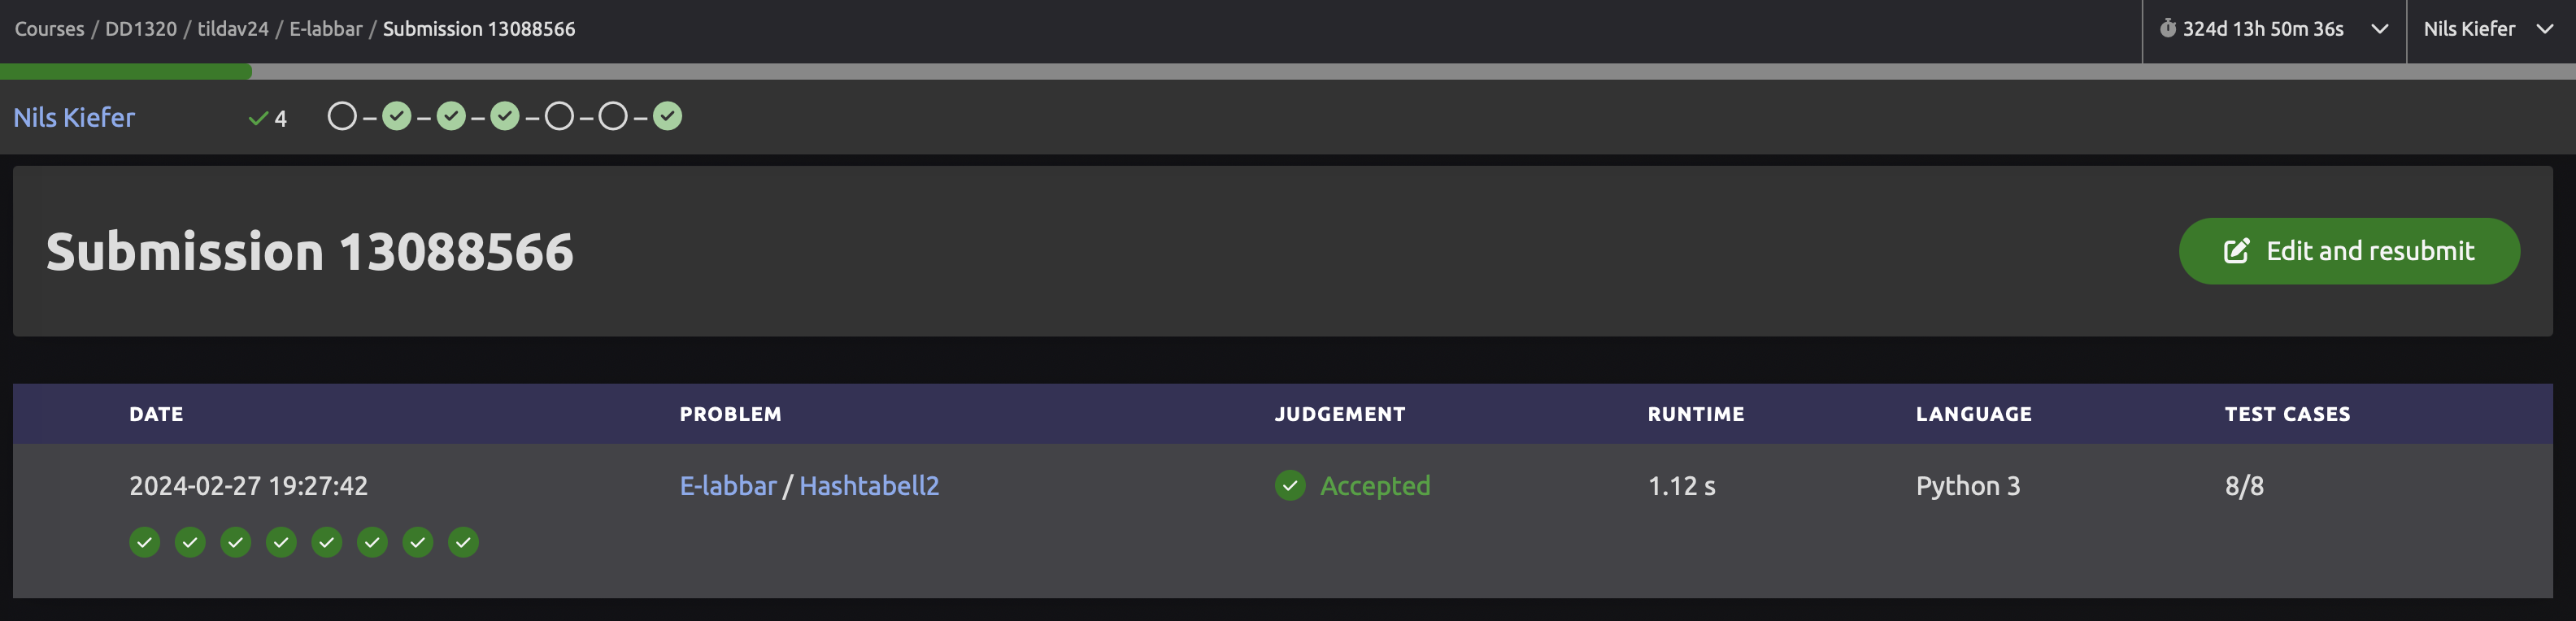

In [75]:
def main():
    hashtable = None

    while True:
        line = input()
        key, *value = line.split()
        if key == "#":
            print("#")
            break
        elif key == "init" and len(value) > 0:
            size = int(value[0])
            hashtable = Hashtable(size)
            print("New size:", size)
        elif len(value) > 0:
            hashtable.store(key, value[0])
            print(key, "<-", value[0])
        else:
            try:
                value = hashtable.search(key)
                print(f"{key}: {value}")
            except KeyError:
                print("KeyError:", key)


if __name__ == "__main__":
    main()

New size: 5
KeyError: H
H <- 1
H: 1
H <- 1.00794
H: 1.00794
KeyError: He
He <- 4
He: 4
He <- 4.002602
He: 4.002602
H: 1.00794
#
